[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_06_2_Logistic_Classification.ipynb)

# Simple Classification Demos (Scikit-Learn)

This notebook shows **just the basics** for three models:
1. Logistic Regression (binary target)
2. Decision Tree Classifier (binary target)
3. Decision Tree Classifier (multiclass target with 3 categories)

Each section loads a small built-in dataset, fits the model, and displays the model summary (coefficients or a tree plot).


In [15]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 1) Logistic Regression (binary) — Breast Cancer dataset

=== Breast Cancer Dataset ===
Target names: [np.str_('malignant'), np.str_('benign')]
Target distribution:
target
benign       357
malignant    212
Name: count, dtype: int64

Number of predictors: 30
Predictor names (first 10): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'] ...


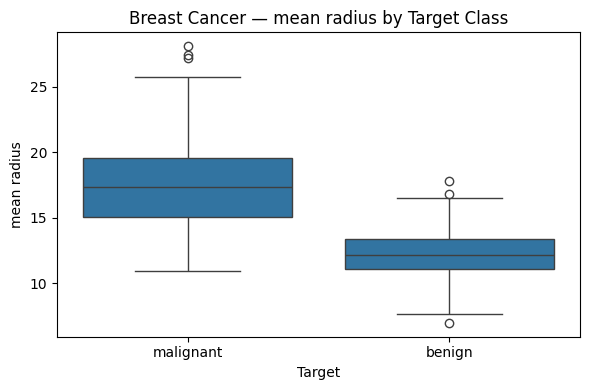

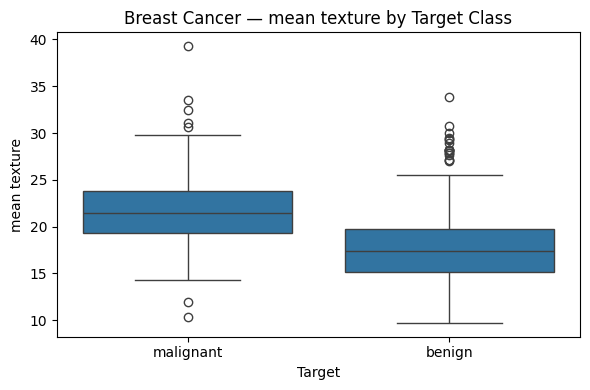

In [16]:

# === Breast Cancer Dataset ===
cancer = datasets.load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name="target")

print("=== Breast Cancer Dataset ===")
print("Target names:", list(cancer.target_names))
print("Target distribution:")
print(y_cancer.value_counts().rename(index=dict(enumerate(cancer.target_names))))
print("\nNumber of predictors:", X_cancer.shape[1])
print("Predictor names (first 10):", list(X_cancer.columns[:10]), "...")

# Boxplots for two selected features
for feat in ["mean radius", "mean texture"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_cancer.map(dict(enumerate(cancer.target_names))), y=X_cancer[feat])
    plt.title(f"Breast Cancer — {feat} by Target Class")
    plt.xlabel("Target")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()

In [17]:

X, y = cancer.data, cancer.target

# Fit logistic regression (keep it simple; no train/test split here)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X, y)

# Extract coefficients
coefs = logreg.coef_[0]
feature_names = cancer.feature_names

# Sort by magnitude
sorted_idx = np.argsort(coefs)

# Top 4 most negative (strongest towards class 0)
top_neg_idx = sorted_idx[:4]
# Top 4 most positive (strongest towards class 1)
top_pos_idx = sorted_idx[-4:]

print("Intercept:", logreg.intercept_[0])
print("\nTop 4 negative coefficients (favor class 0):")
for i in top_neg_idx:
    print(f"  {feature_names[i]:25s} {coefs[i]: .4f}")

print("\nTop 4 positive coefficients (favor class 1):")
for i in reversed(top_pos_idx):
    print(f"  {feature_names[i]:25s} {coefs[i]: .4f}")



Intercept: 27.98606747282615

Top 4 negative coefficients (favor class 0):
  worst concavity           -1.4244
  worst symmetry            -0.7338
  worst compactness         -0.6777
  worst concave points      -0.6102

Top 4 positive coefficients (favor class 1):
  texture error              1.2539
  mean radius                1.0244
  mean texture               0.1794
  worst radius               0.1534


## 2) Decision Tree Classifier (binary) — Breast Cancer dataset

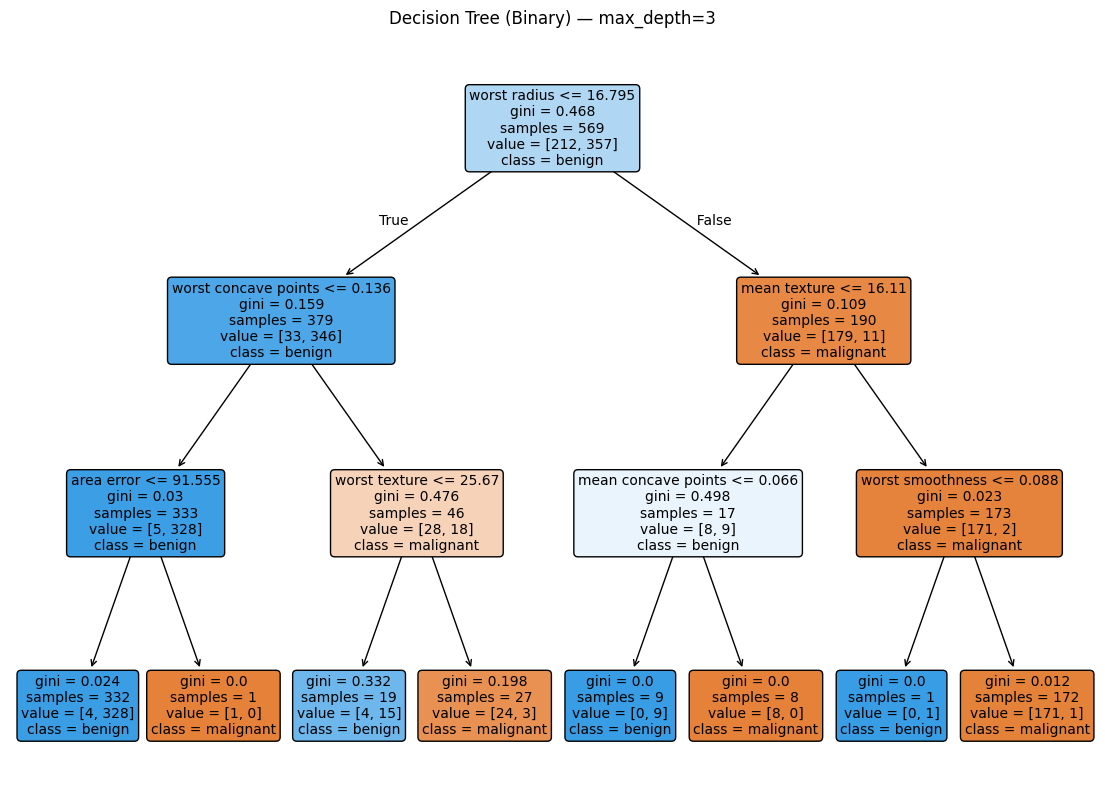

In [5]:
# Fit a small decision tree
tree_bin = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_bin.fit(X, y)

# Plot the tree
plt.figure(figsize=(14, 10))
plot_tree(
    tree_bin,
    feature_names=cancer.feature_names,
    class_names=list(cancer.target_names),
    filled=True,
    rounded=True,
    fontsize = 10
)
plt.title("Decision Tree (Binary) — max_depth=3")
plt.show()


## 3) Decision Tree Classifier (multiclass: 3 categories) — Iris dataset


=== Iris Dataset ===
Target names: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Target distribution:
target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Number of predictors: 4
Predictor names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


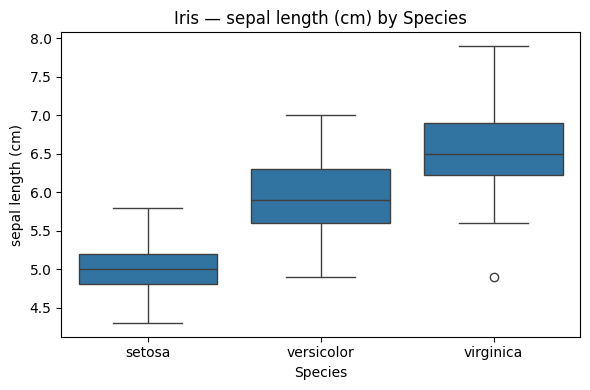

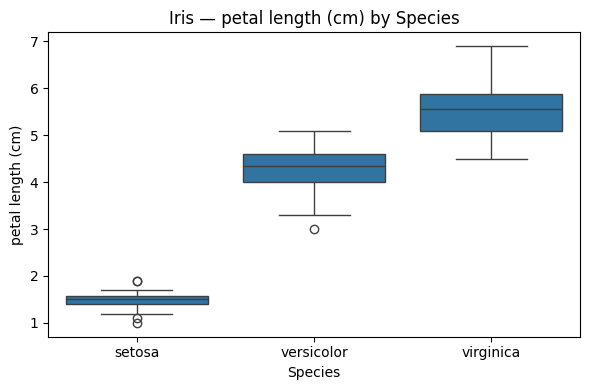

In [18]:
# === Iris Dataset ===
iris = datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target, name="target")

print("\n=== Iris Dataset ===")
print("Target names:", list(iris.target_names))
print("Target distribution:")
print(y_iris.value_counts().rename(index=dict(enumerate(iris.target_names))))
print("\nNumber of predictors:", X_iris.shape[1])
print("Predictor names:", list(X_iris.columns))

# Boxplots for two selected features
for feat in ["sepal length (cm)", "petal length (cm)"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_iris.map(dict(enumerate(iris.target_names))), y=X_iris[feat])
    plt.title(f"Iris — {feat} by Species")
    plt.xlabel("Species")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()

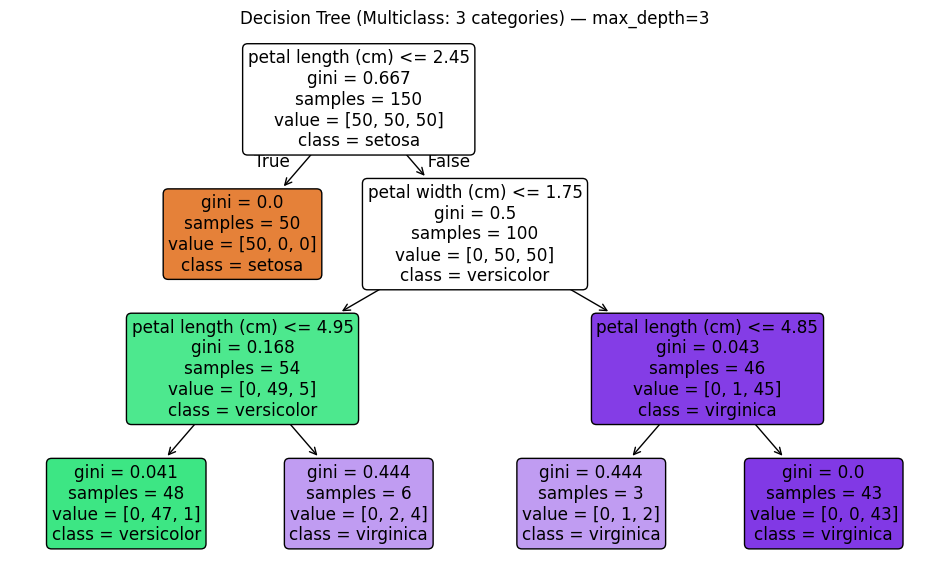

In [ ]:
# Load Iris (3 classes)
X_iris, y_iris = iris.data, iris.target

# Fit a small decision tree
tree_multi = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_multi.fit(X_iris, y_iris)

# Plot the tree
plt.figure(figsize=(12, 7))
plot_tree(
    tree_multi,
    feature_names=iris.feature_names,
    class_names=list(iris.target_names),
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Multiclass: 3 categories) — max_depth=3")
plt.show()
